# IBL ONE Tutorial

# Installing and configuring ONE


## 🏠 Create virtual python environment



---


🔖 **NOTE:** This step is only needed if you want to follow this tutorial on your local computer


---

### Creating a new environment with conda (recommended way)

To create a conda environment, [anaconda](https://www.anaconda.com/) must first be installed.

Once installed launch an anaconda prompt terminal and create a new conda environment

`conda create --name iblenv python=3.9`

The new environment can be activated using,

`conda activate iblenv`

### Creating a new environment with virtualenv

A new virtualenv can be created by launching a terminal and typing the following

`virtualenv iblenv --python=python3`

The new environment can be activated using,

`source ./iblenv/bin/activate`

## Install relevent packages



---


⚡ **INFORMATION:** To install locally remove the ! (e.g pip install ONE-api)


---



In [11]:
! pip install ONE-api
! pip install ibllib

## Configure ONE

In [12]:
from one.api import ONE
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')

---


> 📘 **FURTHER READING**
> *   [ONE install and setup](https://int-brain-lab.github.io/ONE/one_installation.html)


---

# Instantiating ONE

Once `ONE` has been configured it can be imported and instantiated in the following way

In [13]:
from one.api import ONE
one = ONE()

In [14]:
all_subjects = one.list_subjects()

# Some useful concepts

## Sessions vs Insertions



Depending on the type of analysis that you are doing, you will want to start your search from either the session or insertion endpoint.



*   A `session` refers to an *experimental session* and can contain multiple insertions.
*   An `insertion` is a *single Neuropixels recording* within a session.

For example, if you are interested in the correlation of activity across different brain areas within a single session, you would want to enter your search through the session endpoint. If, however, you are interested in doing an analysis across multiple Neuropixels recordings within a single brain region, the insertion endpoint should be your point of entry.

# Searching for data with ONE


## `one.search` - searching on sessions

ONE contains a built in search method that can be used to filter for sessions that match specific search criteria.

For example, we can search for all sessions from a particular subject, KS023

In [15]:
# Find sessions from subject KS023
sess = one.search(subject='CSHL034')
print(len(sess))

19


We are returned a list of experiment ids, `eids`


In [16]:
# Print the first 5 eids
from pprint import pprint  # Print larger lists more clearly
pprint(sess[:5])

['b20e3138-beac-4129-9c6c-f00b2bcfc212',
 'b0b48278-b096-4514-ad18-1991abb9e8d2',
 '24654753-98ca-4edb-aa87-477e73e20087',
 '0cac7e45-4bf2-43ec-8aa7-7786135db644',
 'a5d8d1d8-df6d-4d0c-98eb-ae8df2bb0b34']


We can further filter the sessions by those collected in a certain data range,

In [17]:
# Find sessions from KS023 collected in December 2919
sess = one.search(subject='KS023', date_range=['2019-12-01', '2019-12-31'])
print(len(sess))

4


The possible list of terms that can be used to search with this method can be found in the following way,

In [18]:
search_terms = one.search_terms('remote')
pprint(search_terms)

('subject',
 'procedures',
 'number',
 'name',
 'dataset_types',
 'json',
 'n_trials',
 'datasets',
 'task_protocol',
 'start_time',
 'atlas_id',
 'limit',
 'date_range',
 'end_time',
 'parent_session',
 'tag',
 'id',
 'dataset',
 'type',
 'nickname',
 'atlas_name',
 'django',
 'extended_qc',
 'narrative',
 'laboratory',
 'n_correct_trials',
 'projects',
 'dataset_qc_lte',
 'auto_datetime',
 'performance_gte',
 'project',
 'users',
 'offset',
 'location',
 'histology',
 'performance_lte',
 'qc',
 'atlas_acronym')


---


> 📘 **FURTHER READING**
> *   [ONE modes](https://int-brain-lab.github.io/ONE/notebooks/one_modes.html)


---


## `one.search_insertions` - searching on insertions

ONE also has a built in method that can be used to filter for insertions that match a specific search criteria.

For example, we can search for all insertions associated to a particular subject

In [19]:
# Find insertions for the subject KS023
ins = one.search_insertions(subject='KS023')
print(len(ins))

8


We are returned a list of probe insertion ids, `pids`

In [20]:
# Print the first 5 pids
from pprint import pprint  # Print larger lists more clearly
pprint(ins[:5])

['b749446c-18e3-4987-820a-50649ab0f826',
 '45e7731f-4a43-45d5-9029-c080150bc596',
 'f44d2056-644c-4769-a189-7efe67b0269d',
 '26af22bb-b295-4a45-8ed3-1700604c0708',
 '6a22a5b4-79ec-4b3c-b023-1ec7b4a2b675']


We can further restrict our search to only insertions with a particular probe label

In [21]:
# Find insertions for subject KS023 with name probe00
ins = one.search_insertions(subject='KS023', name='probe00')
print(len(ins))

4


We can list all the possible search terms in the following way

In [22]:
search_terms = one.search_terms('remote', 'insertions')
pprint(search_terms)

('limit',
 'offset',
 'id',
 'name',
 'session',
 'model',
 'serial',
 'auto_datetime',
 'datasets',
 'chronic_insertion',
 'django',
 'subject',
 'date',
 'experiment_number',
 'dataset_types',
 'dataset_qc_lte',
 'lab',
 'project',
 'task_protocol',
 'tag',
 'atlas_name',
 'atlas_acronym',
 'atlas_id')



---


> 📘 **FURTHER READING**
> *   [Searching with ONE](https://int-brain-lab.github.io/ONE/notebooks/one_search/one_search.html)


---





We refer to the unique identifiers for a session and insertion respectively as,
- `eid` (experiment/ session id)
- `pid` (probe insertion id)

You will likely need to convert between the two when loading data. The following `ONE` methods can be used for this.

In [23]:
# Given an eid, find the pid(s)
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
pids, labels = one.eid2pid(eid)
for pid, name in zip(pids, labels):
  print(f'pid: {pid}, pname: {name}')

# Given a pid, find the eid
pid = '695476f6-4c14-4a2f-b658-948514629079'
eid, pname = one.pid2eid(pid)
print(f'\nSession associated with pid {pid}')
print(f'eid: {eid}, pname: {pname}')

pid: 4755877d-fd14-42b3-bc15-e1996d153015, pname: probe01
pid: 695476f6-4c14-4a2f-b658-948514629079, pname: probe00

Session associated with pid 695476f6-4c14-4a2f-b658-948514629079
eid: 4720c98a-a305-4fba-affb-bbfa00a724a4, pname: probe00


## Examples using one search methods

### Find sessions/insertions for a particular subject


In [24]:
subject = 'DY_011'
# query sessions endpoint
sessions_selected= []

for sub in all_subjects:
  sessions_selected = one.search(subject=subject) + sessions_selected
  print(f'No. of detected sessions: {len(sessions_selected)}')

## query insertions endpoint
# insertions = one.search_insertions(subject=subject)
# print(f'No. of detected insertions: {len(insertions)}')

No. of detected sessions: 55
No. of detected sessions: 110
No. of detected sessions: 165
No. of detected sessions: 220
No. of detected sessions: 275
No. of detected sessions: 330
No. of detected sessions: 385
No. of detected sessions: 440
No. of detected sessions: 495
No. of detected sessions: 550
No. of detected sessions: 605
No. of detected sessions: 660
No. of detected sessions: 715
No. of detected sessions: 770
No. of detected sessions: 825
No. of detected sessions: 880
No. of detected sessions: 935
No. of detected sessions: 990
No. of detected sessions: 1045
No. of detected sessions: 1100
No. of detected sessions: 1155
No. of detected sessions: 1210
No. of detected sessions: 1265
No. of detected sessions: 1320
No. of detected sessions: 1375
No. of detected sessions: 1430
No. of detected sessions: 1485
No. of detected sessions: 1540
No. of detected sessions: 1595
No. of detected sessions: 1650
No. of detected sessions: 1705
No. of detected sessions: 1760
No. of detected sessions: 1

In [25]:
len(sessions_selected)

16445

### Find sessions/insertions with a specific dataset

In [26]:
dataset = 'spikes.times.npy'
# query sessions endpoint
sessions = one.search(dataset=dataset)
print(f'No. of detected sessions: {len(sessions)}')

# query insertions endpoint
insertions = one.search_insertions(datasets=dataset)
print(f'No. of detected insertions: {len(insertions)}')

No. of detected sessions: 483
No. of detected insertions: 723


---


> 📘 **FURTHER READING**
> *   [Information on IBL datasets](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit)


---


### Find sessions/insertions that record from a particular brain area

In [27]:
brain_acronym = 'CA1'
# query sessions endpoint
sessions = one.search(atlas_acronym=brain_acronym, query_type='remote')
print(f'No. of detected sessions: {len(sessions)}')

# query insertions endpoint
insertions = one.search_insertions(atlas_acronym=brain_acronym)
print(f'No. of detected insertions: {len(insertions)}')

No. of detected sessions: 205
No. of detected insertions: 205


---


⚡ **INFORMATION:** IBL follows the Allen CCF for identifying brain regions


---


### Find sessions/insertions associated to a particular tag

In [28]:
tag = '2022_Q4_IBL_et_al_BWM'
# query sessions endpoint
sessions = one.search(tag=tag, query_type='remote')
print(f'No. of detected sessions: {len(sessions)}')

# query insertions endpoint
insertions = one.search_insertions(tag=tag)
print(f'No. of detected insertions: {len(insertions)}')


No. of detected sessions: 354
No. of detected insertions: 547


---


> 📘 **FURTHER READING**
> *   [Available IBL data releases](https://int-brain-lab.github.io/iblenv/notebooks_external/data_download.html#Find-data-associated-with-a-release-or-publication)


---


## 🏠 Relationship between eid and location of data locally

An `eid` represents a unique experiment identifier and can also encoded by a specific path with the following strucutre `lab/Subjects/subject_name/date/session_number`. We refer to this as the `session path` and this also represents the location on your local where data for each session is stored. We can convert between an `eid` and a `session path` using the following `ONE` methods

In [29]:
# Given an eid find the session path
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
session_path = one.eid2path(eid)
print(f'eid: {eid}')
print(f'session_path: {session_path}')

# Given a session path find the eid
eid = one.path2eid(session_path)
print(f'\nsession_path: {session_path}')
print(f'eid: {eid}')

eid: 4720c98a-a305-4fba-affb-bbfa00a724a4
session_path: C:\Users\Daniel\Downloads\ONE\openalyx.internationalbrainlab.org\danlab\Subjects\DY_014\2020-07-14\001

session_path: C:\Users\Daniel\Downloads\ONE\openalyx.internationalbrainlab.org\danlab\Subjects\DY_014\2020-07-14\001
eid: 4720c98a-a305-4fba-affb-bbfa00a724a4


---


> 📘 **FURTHER READING**
> *   [Eids and session paths](https://int-brain-lab.github.io/ONE/notebooks/experiment_ids.html)


---

# Listing and loading data with ONE

Once a session or insertion of interest has been found, the data belonging to that session can explored using the `one.list` methods and loaded using one of the `one.load` methods.

Both the `one.list` and `one.load` methods require the eid as an argument. If, therefore, you are starting from a pid, make sure to convert using `eid, pname = one.pid2eid(pid)`.

### `one.list_datasets`

All datasets associated with a given session can be listed using the `one.list_datasets` method,

In [30]:
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
datasets = one.list_datasets(eid)
print(datasets[0:5])

['alf/#2023-04-20#/_ibl_leftCamera.times.npy', 'alf/#2023-04-20#/_ibl_rightCamera.times.npy', 'alf/#2023-04-20#/licks.times.npy', 'alf/_ibl_leftCamera.dlc.pqt', 'alf/_ibl_leftCamera.features.pqt']


The format of the returned datasets gives the path of the collection followed by the dataset. e.g in the case of `alf/trials.table.pqt`, `alf` is the collection and `trials.table.pqt` is the dataset. The collection is important as it differentiates datasets with the same name e.g `spikes.times.npy` in `alf/probe00/pykilosort` and `spikes.times.npy` in `alf/probe01/pykilosort`.

### `one.describe_dataset`

We can find out more information about a specific dataset by using the `one.describe_dataset` method. For example to find out more about the `trials.table` dataset we can do,

In [31]:
one.describe_dataset('trials.table');

A table of trial events, one per trial. Events include: intervals, goCue_times, response_times, choice, stimOn_times, contrastLeft, contrastRight, feedback_times, feedbackType, rewardVolume, probabilityLeft, firstMovement_times




---


⚡ **INFORMATION:** Most datasets are also described in this [Google Document](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.hnjqyfnroyya)


---



### `one.list_collections`

The unique group of collections that belong to a session can be listed using the `one.list_collections` method,

In [32]:
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
collections = one.list_collections(eid)
print(collections)

['alf/probe00/pykilosort', 'alf', 'alf/probe01/pykilosort', 'raw_ephys_data/probe01', 'raw_ephys_data', 'raw_ephys_data/probe00', 'alf/probe01', 'alf/probe00', 'raw_passive_data', 'raw_video_data']


### `one.load_dataset`

A single dataset can be downloaded and loaded into memory by passing in the eid and dataset as arguemnts into the `one.load_dataset` method,

In [33]:
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'

# Download and load the left camera timestamps
left_cam_times = one.load_dataset(eid, '_ibl_leftCamera.times.npy')

# Download and load the spikes times for probe00
spike_times = one.load_dataset(eid, 'spikes.times.npy', collection='alf/probe00/pykilosort')

### `one.load_object`

A group of attributes (e.g amps, depths, metrics) belonging to the same object (e.g clusters) can be downloaded and loaded in one command using the `one.load_object` method,



In [34]:
pid = '695476f6-4c14-4a2f-b658-948514629079'
eid, pname = one.pid2eid(pid)
# Download and load in the clusters object for probe01
clusters = one.load_object(eid, 'clusters', collection=f'alf/{pname}/pykilosort')
print(list(clusters.keys()))

# Only download the clusters object for probe01
clusters = one.load_object(eid, 'clusters', collection=f'alf/{pname}/pykilosort', download_only=True)


['amps', 'channels', 'depths', 'metrics', 'peakToTrough', 'uuids', 'waveforms', 'waveformsChannels']




---


⚡ **INFORMATION:** For some datasets we had to specify a `collection` argument in order to load in the data. The collection must be specified when more than one of the same dataset exists in the same session e.g the spikesorting data for different insertions.


---







> 📘 **FURTHER READING**
> *   [Listing with ONE](https://int-brain-lab.github.io/ONE/notebooks/one_list/one_list.html)
> *   [Loading with ONE](https://int-brain-lab.github.io/ONE/notebooks/one_load/one_load.html)
> *   [Loading different data types](https://int-brain-lab.github.io/iblenv/loading_examples.html)


---

# Loading functions



For convenience a number of loading functions exist that use the `one.load` methods under the hood to collect all relevant data for a session or a probe insertion.

### SessionLoader

The Session Loader can be used to load in all behavioural, wheel and video data associated to a session. It can be instantiated with an ONE instance and an eid in the following way.

In [35]:
# import session loader
from brainbox.io.one import SessionLoader
# import ONE and instantiate
from one.api import ONE
one = ONE()
# Define eid
eid = '46794e05-3f6a-4d35-afb3-9165091a5a74'

# instantiate session loader
sess_loader = SessionLoader(one=one, eid=eid)

In [36]:
my_dict = {}
import numpy as np
from matplotlib import pyplot as plt
for eid in  sessions_selected[1:3000]:
  sess_loader = SessionLoader(one=one, eid=eid)
  sess_loader.load_trials()
  my_dict[eid] = {}
  reaction_time = sess_loader.trials['response_times'] - sess_loader.trials['stimOn_times']
  cumsum = np.cumsum(sess_loader.trials['rewardVolume'])
  unique_elements, indices = np.unique(cumsum, return_index=True)
  my_dict[eid]['vol']=  cumsum[indices]
  my_dict[eid]['reaction_time']= reaction_time[indices]


Different portions of the session data can then be loaded,

Alternatively you can load all the data in one using,

In [28]:
sess_loader.load_session_data()

2024-07-24 08:16:32 INFO     one.py:1404 Loading wheel data
2024-07-24 08:16:32 WARNING  one.py:1408 Could not load wheel data.
2024-07-24 08:16:32 INFO     one.py:1404 Loading pose data
2024-07-24 08:16:32 WARNING  one.py:1408 Could not load pose data.
2024-07-24 08:16:32 INFO     one.py:1404 Loading motion_energy data
2024-07-24 08:16:32 WARNING  one.py:1408 Could not load motion_energy data.
2024-07-24 08:16:32 INFO     one.py:1404 Loading pupil data
2024-07-24 08:16:32 WARNING  one.py:1408 Could not load pupil data.


Not all sessions have all of the data available and one can see what data has been loaded using the `data_info` method

In [29]:
sess_loader.data_info

,name,is_loaded
0,trials,True
1,wheel,False
2,pose,False
3,motion_energy,False
4,pupil,False


The different types of data are loaded as pandas dataframes that you can access via the respective attributes, for example

In [4]:
# # access trials data and list the keys of dataframe
# print(f'Keys in trials data: {sess_loader.trials.keys()}')

# # access wheel data and get the shape of dataframe
# print(f'\nShape of wheel data: {sess_loader.wheel.shape}')

---


> 📘 **FURTHER READING**
> *   [SessionLoader](https://int-brain-lab.github.io/iblenv/_autosummary/brainbox.io.one.html#brainbox.io.one.SessionLoader)


---

KeyboardInterrupt: 

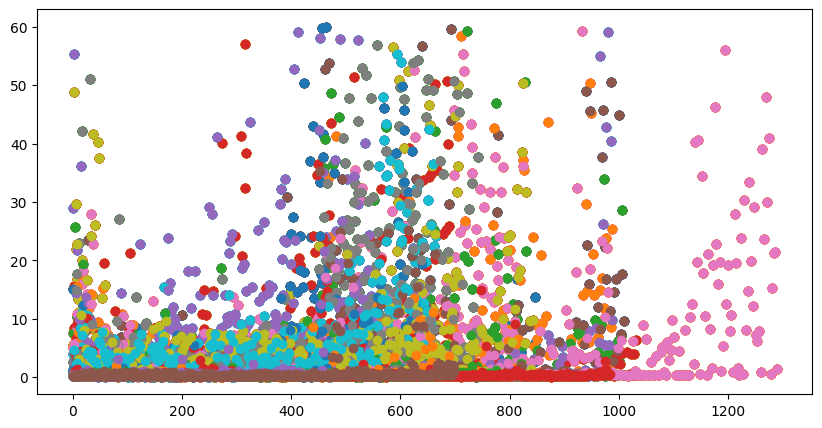

In [37]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
for i in sessions_selected:
  plt.scatter(my_dict[i]['vol'], my_dict[i]['reaction_time'])


In [7]:
# sess_loader.trials['contrastLeft'].to_list()
# sess_loader.trials['rewardVolume']

### SpikeSortingLoader

In [8]:
# sess_loader.trials['rewardVolume']

NameError: name 'sess_loader' is not defined

In [38]:
# Define reaction time as the time when the visual stimulus first appears and detected response time
reaction_time = sess_loader.trials['response_times'] - sess_loader.trials['stimOn_times']

Original array: 0        0.0
1        1.5
2        3.0
3        4.5
4        6.0
       ...  
470    549.0
471    549.0
472    549.0
473    549.0
474    550.5
Name: rewardVolume, Length: 475, dtype: float64
Array with duplicates removed: 0        0.0
1        1.5
2        3.0
3        4.5
4        6.0
       ...  
466    544.5
467    546.0
468    547.5
470    549.0
474    550.5
Name: rewardVolume, Length: 368, dtype: float64


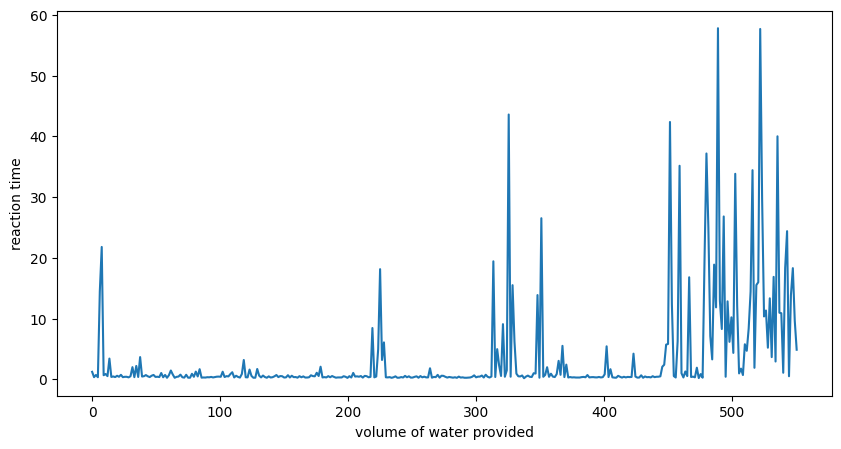

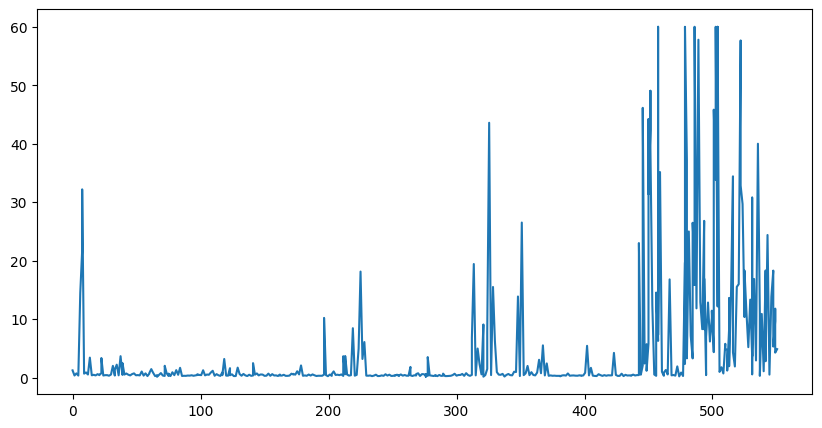

In [39]:
plt.rcParams['figure.figsize'] = [10,5]
cumsum = np.cumsum(sess_loader.trials['rewardVolume'])
unique_elements, indices = np.unique(cumsum, return_index=True)

# Sort the indices to maintain the original order
sorted_indices = np.sort(indices)

# Get the array with duplicates removed
unique_cumsum = cumsum[sorted_indices]

print("Original array:", cumsum)
print("Array with duplicates removed:", unique_cumsum)

plt.plot(unique_cumsum,reaction_time[sorted_indices])

plt.xlabel("volume of water provided")
plt.ylabel("reaction time")

# plt.plot()
plt.figure()
plt.plot(cumsum,reaction_time)

In [40]:
my_dict[eid]['vol'].to_numpy().reshape(1,-1)

array([[  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ,  16.5,  18. ,  19.5,  21. ,  22.5,  24. ,  25.5,
         27. ,  28.5,  30. ,  31.5,  33. ,  34.5,  36. ,  37.5,  39. ,
         40.5,  42. ,  43.5,  45. ,  46.5,  48. ,  49.5,  51. ,  52.5,
         54. ,  55.5,  57. ,  58.5,  60. ,  61.5,  63. ,  64.5,  66. ,
         67.5,  69. ,  70.5,  72. ,  73.5,  75. ,  76.5,  78. ,  79.5,
         81. ,  82.5,  84. ,  85.5,  87. ,  88.5,  90. ,  91.5,  93. ,
         94.5,  96. ,  97.5,  99. , 100.5, 102. , 103.5, 105. , 106.5,
        108. , 109.5, 111. , 112.5, 114. , 115.5, 117. , 118.5, 120. ,
        121.5, 123. , 124.5, 126. , 127.5, 129. , 130.5, 132. , 133.5,
        135. , 136.5, 138. , 139.5, 141. , 142.5, 144. , 145.5, 147. ,
        148.5, 150. , 151.5, 153. , 154.5, 156. , 157.5, 159. , 160.5,
        162. , 163.5, 165. , 166.5, 168. , 169.5, 171. , 172.5, 174. ,
        175.5, 177. , 178.5, 180. , 181.5, 183. , 184.5, 186. , 187.5,
      

In [41]:
my_dict[eid]['reaction_time']

0       1.2278
1       0.3498
2       0.7127
3       0.3389
4      14.4599
        ...   
466     0.5010
467    13.8256
468    18.3023
470     9.6527
474     4.8641
Length: 368, dtype: float64

In [42]:
volume_array = np.array([[]])
reaction_time_array = np.array([[]])

for eid in  sessions_selected[1:10000]:
  volume_array = np.concatenate((volume_array,my_dict[eid]['vol'].to_numpy().reshape(1,-1)), axis=1)
  reaction_time_array = np.concatenate((reaction_time_array,my_dict[eid]['reaction_time'].to_numpy().reshape(1,-1)), axis=1)
volume_array = volume_array[~np.isnan(reaction_time_array)]
reaction_time_array = reaction_time_array[~np.isnan(reaction_time_array)]

In [48]:
from scipy.stats import norm
from scipy.stats import shapiro
p_list = {}
mu_list = {}
std_list = {}
count_list = {}
for window_size in [0.5,1,50]:
  p_list[window_size] = []
  mu_list[window_size] = []
  std_list[window_size] = []
  count_list[window_size] = []
  for i in range(0, np.floor(np.max(volume_array)).astype(int),1):
    # print(i)
    window_data = reaction_time_array[(volume_array>i)&(volume_array<window_size+i)]  # Extract the window
    # window_data = np.log(window_data)
    # print(window_data)
    if window_data.size >100:
      try:
        statistic, p_value = shapiro(window_data)
        mu, std = norm.fit(window_data)
        p_list[window_size].append(p_value)
        mu_list[window_size].append(mu)
        std_list[window_size].append(std)
        count_list[window_size].append(window_data.size)
      except Exception as err:
        # print(err)
        pass

C:\Users\Daniel\AppData\Local\Temp\ipykernel_4468\1445692577.py:19: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  statistic, p_value = shapiro(window_data)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4468\1445692577.py:19: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6914.
  statistic, p_value = shapiro(window_data)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4468\1445692577.py:19: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8551.
  statistic, p_value = shapiro(window_data)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4468\1445692577.py:19: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8732.
  statistic, p_value = shapiro(window_data)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_4468\1445692577.py:19: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be

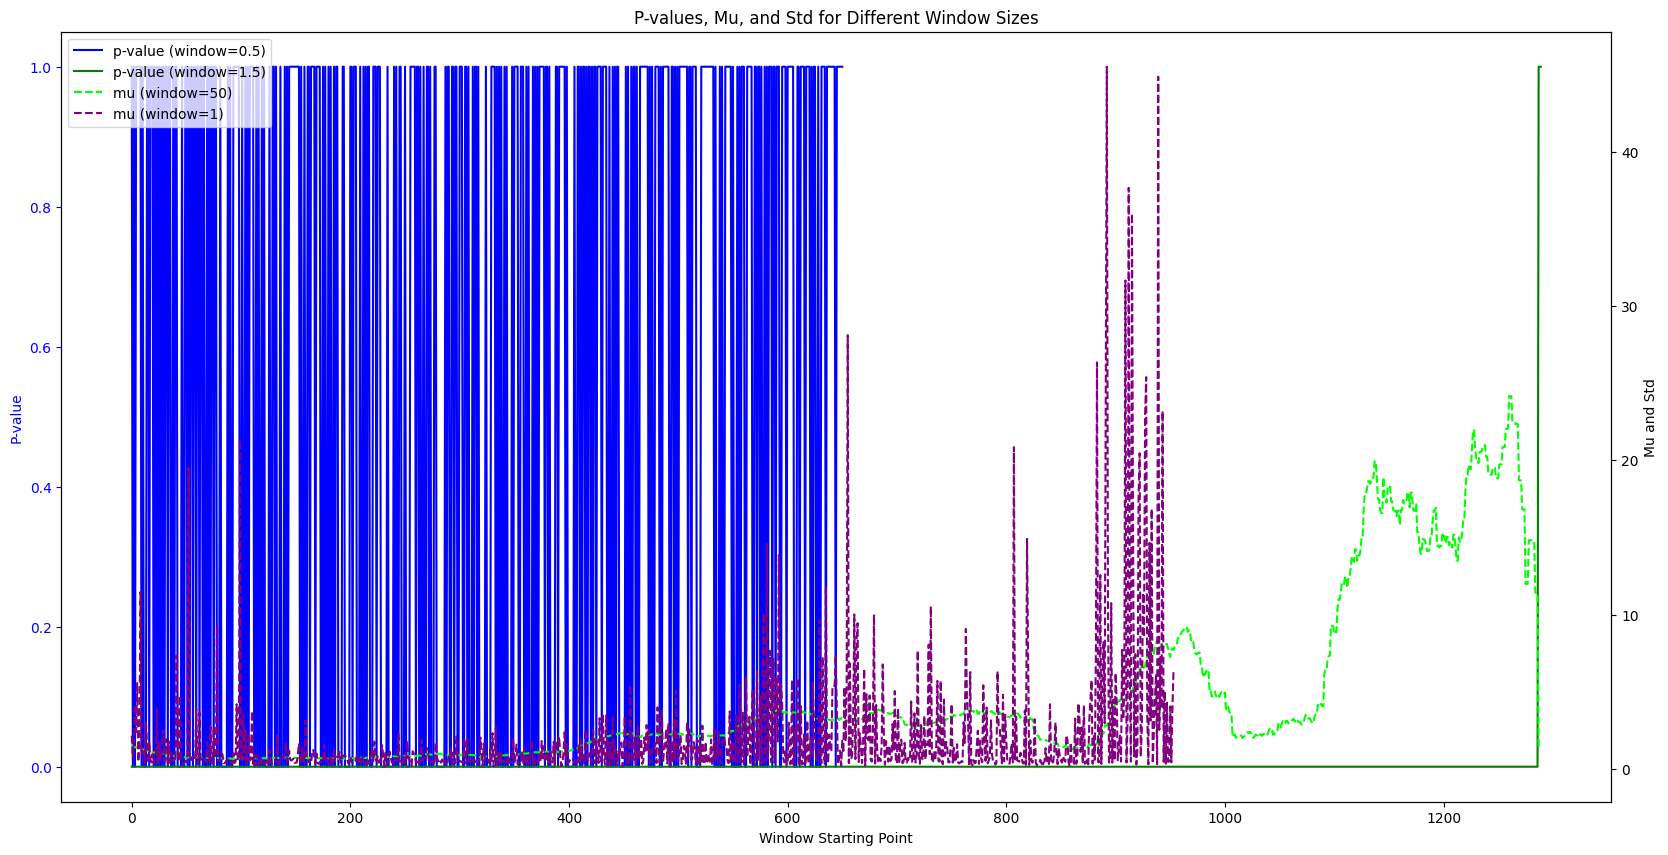

In [51]:
# prompt: plot each of the lists of p_list, my_list and std_list on the same graaph

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]
# Assuming p_list, mu_list, and std_list are already defined as in the preceding code

fig, ax1 = plt.subplots()

# Plot p-values on the left y-axis
ax1.plot(p_list[0.5], label='p-value (window=0.5)', color='blue')
ax1.plot(p_list[50], label='p-value (window=1.5)', color='green')
# ax1.plot(p_list[1], label='p-value (window=1)', color='red')
ax1.set_xlabel('Window Starting Point')
ax1.set_ylabel('P-value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for mu and std
ax2 = ax1.twinx()
# ax2.plot(mu_list[0.5], label='mu (window=0.5)', color='orange', linestyle='--')
ax2.plot(mu_list[50], label='mu (window=50)', color='lime', linestyle='--')
ax2.plot(mu_list[1], label='mu (window=1)', color='purple', linestyle='--')
# ax2.plot(std_list[0.5], label='std (window=0.5)', color='blue', linestyle=':')
# ax2.plot(count_list[1], label='p-value (window=1)', color='blue')
# ax2.plot(std_list[50], label='std (window=50)', color='green', linestyle=':')
# ax2.plot(std_list[1], label='std (window=1)', color='red', linestyle=':')
ax2.set_ylabel('Mu and Std', color='black')
ax2.tick_params('y', colors='black')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('P-values, Mu, and Std for Different Window Sizes')
plt.show()


In [ ]:
plt.plot(count_list[1]>1000)

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:

np.array(count_list[1])>1000

array([ True,  True,  True, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True,

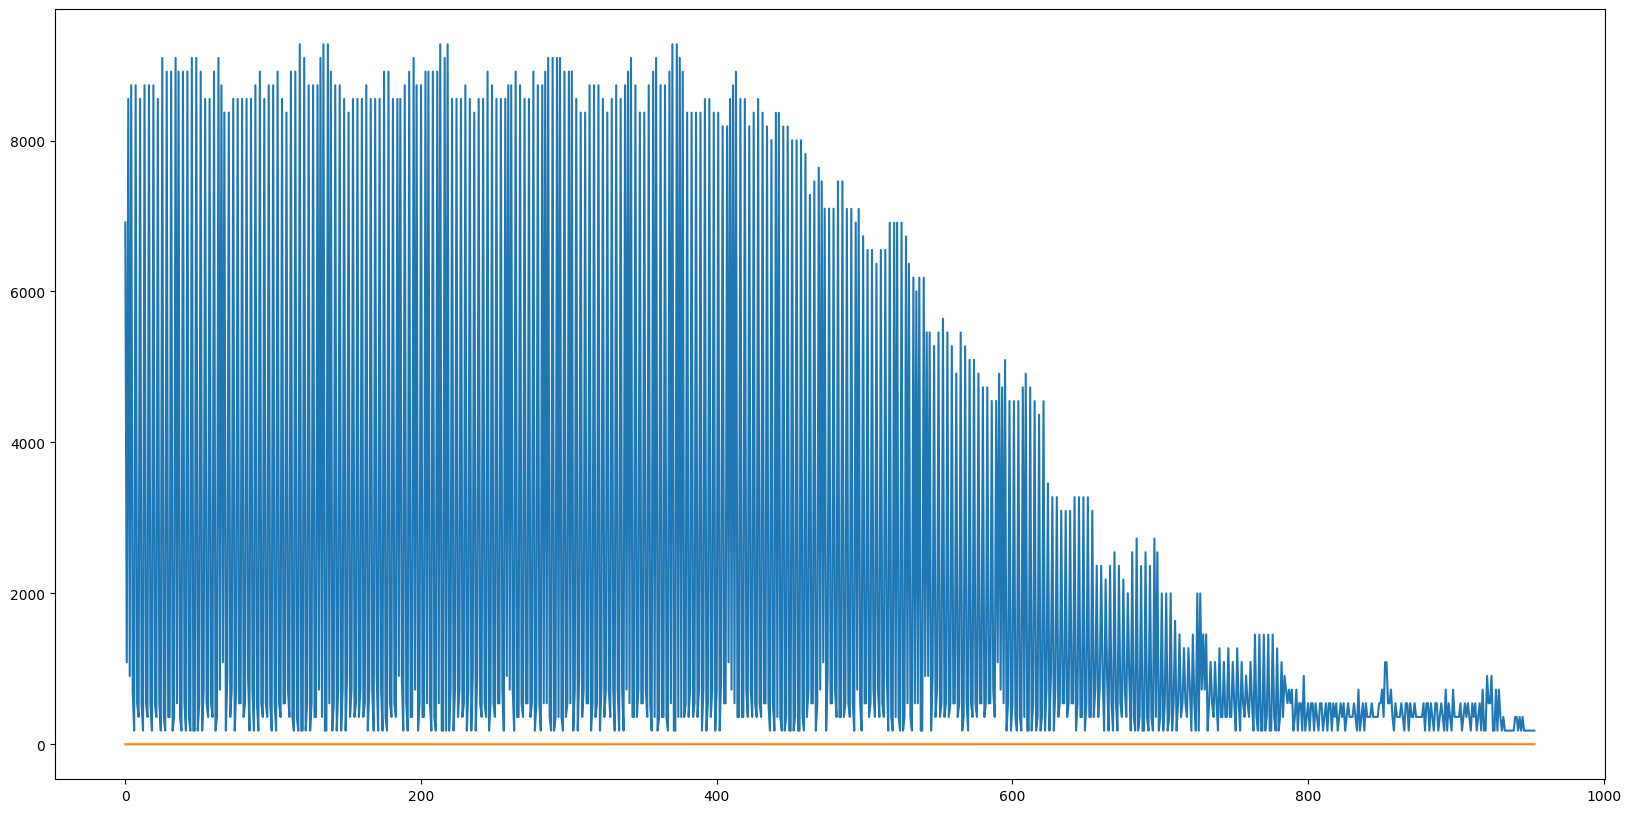

In [ ]:
plt.plot(count_list[1])
plt.plot(p_list[1])

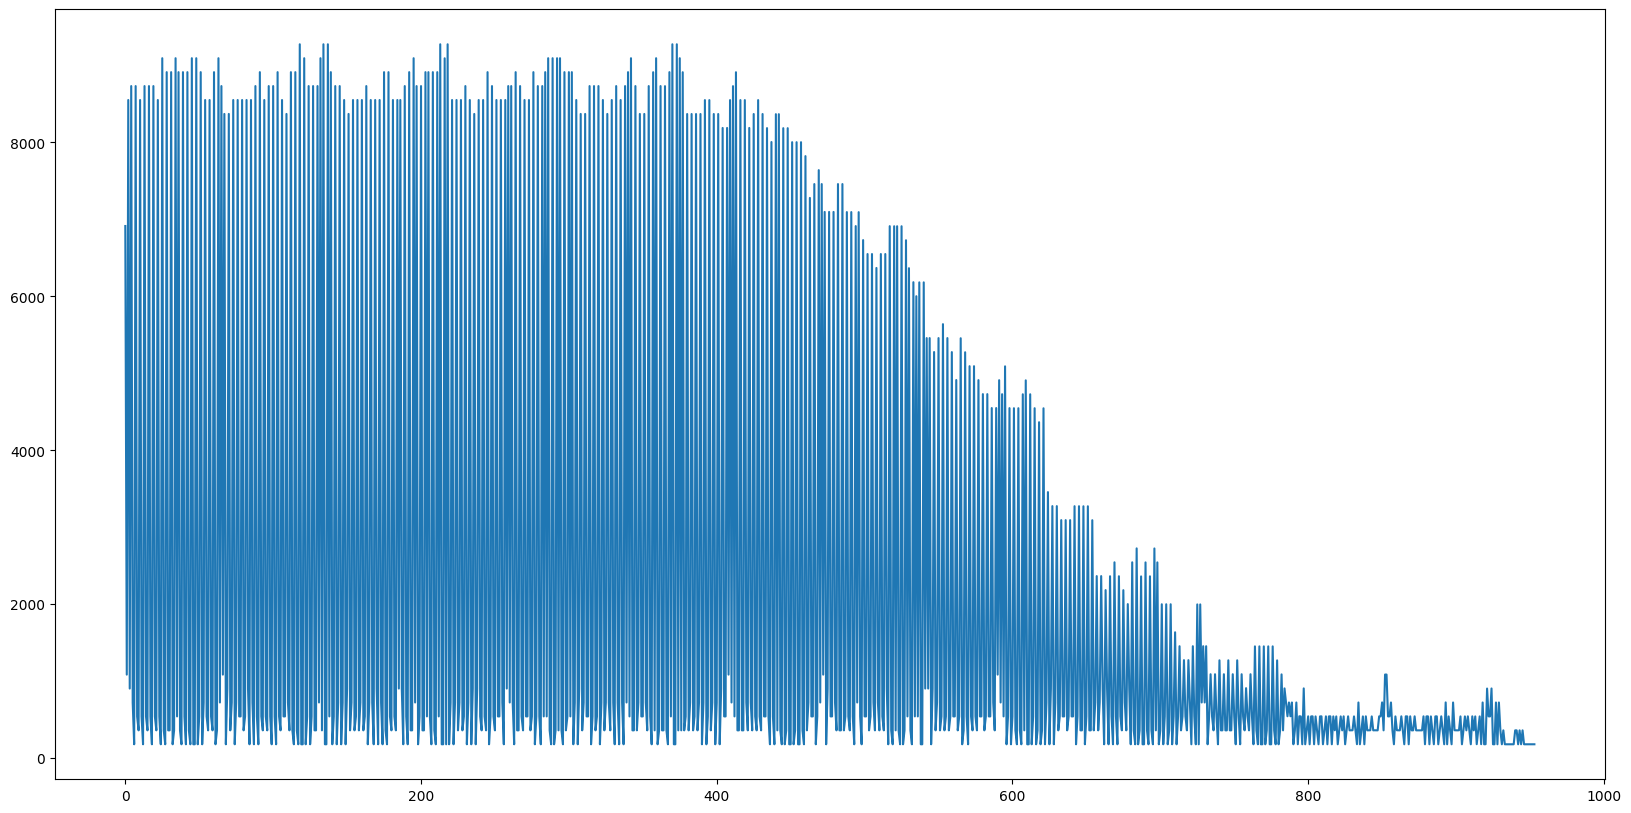

In [ ]:
plt.plot(count_list[1])

In [ ]:
p_list[1]

[1.3647306301193156e-92,
 1.4379706753474373e-42,
 1.0417300005031606e-101,
 1.2338224441526305e-40,
 4.5514804523090096e-92,
 8.780990380638154e-37,
 1.0,
 4.5446464888867684e-97,
 2.7048001387365663e-26,
 5.247266917969198e-27,
 5.428240146458538e-97,
 2.9629199938160017e-32,
 1.0,
 2.147478399284774e-97,
 2.2779887585660185e-33,
 5.247266917969198e-27,
 1.9919427672522337e-98,
 1.6199803812827217e-27,
 1.0,
 1.2448505898807154e-97,
 1.089946119477655e-31,
 5.247266917969198e-27,
 2.2466771259045042e-97,
 2.1760829765565137e-32,
 1.0,
 4.3036146950991595e-100,
 5.247266917969198e-27,
 1.0,
 6.414766560994062e-107,
 5.247266917969198e-27,
 5.247266917969198e-27,
 1.5905364152970652e-99,
 1.0,
 5.247266917969198e-27,
 5.710180123299228e-106,
 8.807973556224083e-31,
 1.5733331761671718e-106,
 5.247266917969198e-27,
 1.0,
 2.6205119271272372e-101,
 1.4227207174908828e-26,
 1.0,
 2.7811753561934648e-105,
 5.247266917969198e-27,
 1.0,
 1.3803905994541233e-101,
 1.0,
 1.0,
 1.85835775379228

KeyError: 10

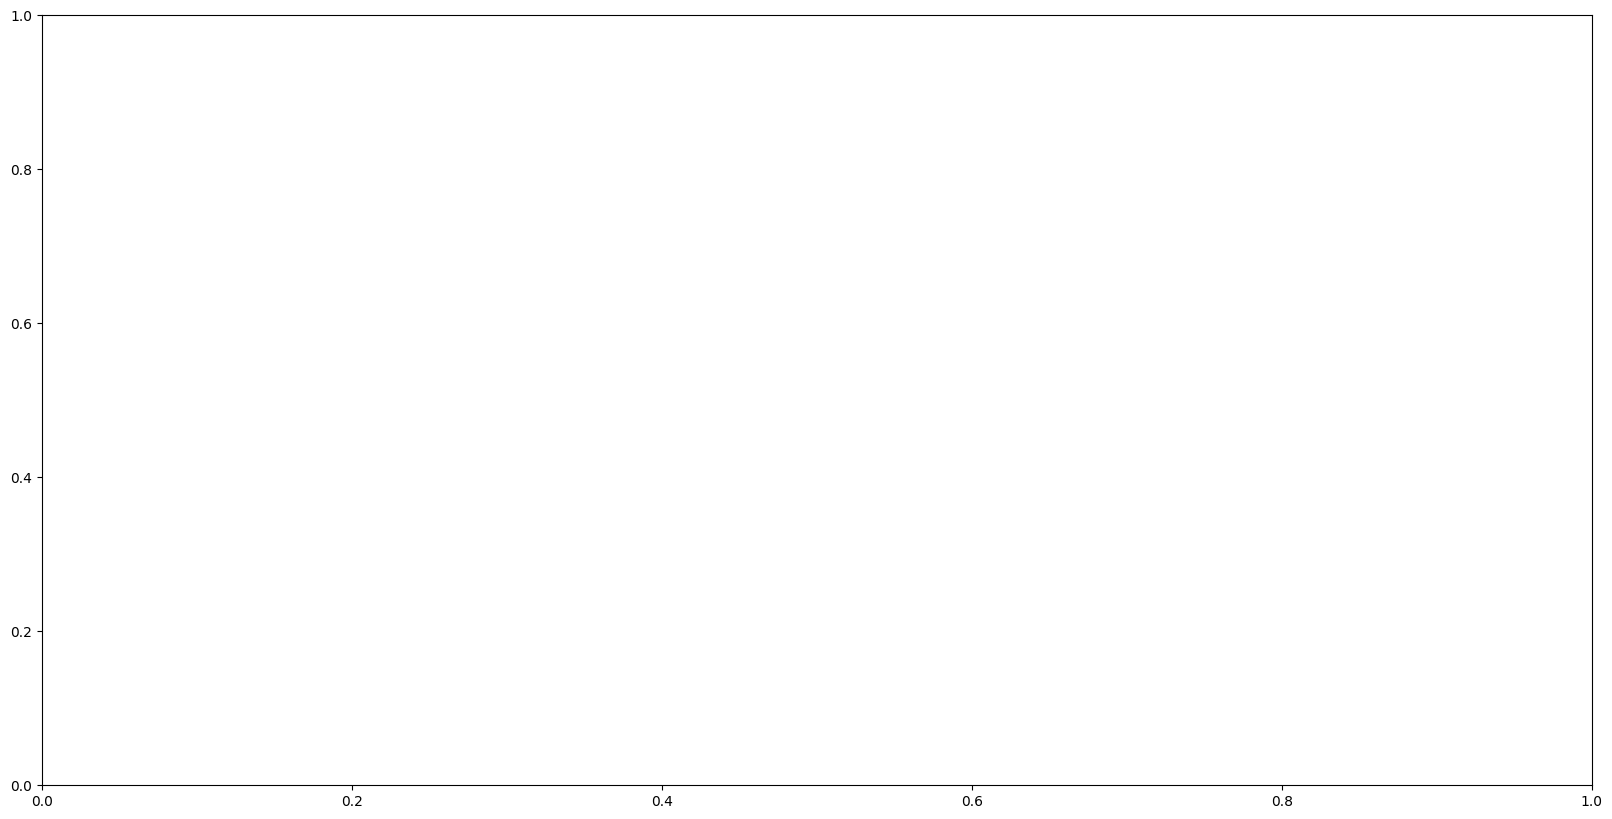

In [ ]:
# prompt: plot each of the lists of p_list, my_list and std_list on the same graaph

import matplotlib.pyplot as plt

# Assuming p_list, mu_list, and std_list are already defined as in the preceding code

fig, ax1 = plt.subplots()

# Plot p-values on the left y-axis
ax1.plot(p_list[10], label='p-value (window=10)', color='blue')
ax1.plot(p_list[50], label='p-value (window=50)', color='green')
ax1.plot(p_list[100], label='p-value (window=100)', color='red')
ax1.set_xlabel('Window Starting Point')
ax1.set_ylabel('P-value', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for mu and std
ax2 = ax1.twinx()
ax2.plot(mu_list[10], label='mu (window=10)', color='cyan', linestyle='--')
ax2.plot(mu_list[50], label='mu (window=50)', color='lime', linestyle='--')
ax2.plot(mu_list[100], label='mu (window=100)', color='pink', linestyle='--')
ax2.plot(std_list[10], label='std (window=10)', color='blue', linestyle=':')
ax2.plot(std_list[50], label='std (window=50)', color='green', linestyle=':')
ax2.plot(std_list[100], label='std (window=100)', color='red', linestyle=':')
ax2.set_ylabel('Mu and Std', color='black')
ax2.tick_params('y', colors='black')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('P-values, Mu, and Std for Different Window Sizes')
plt.show()


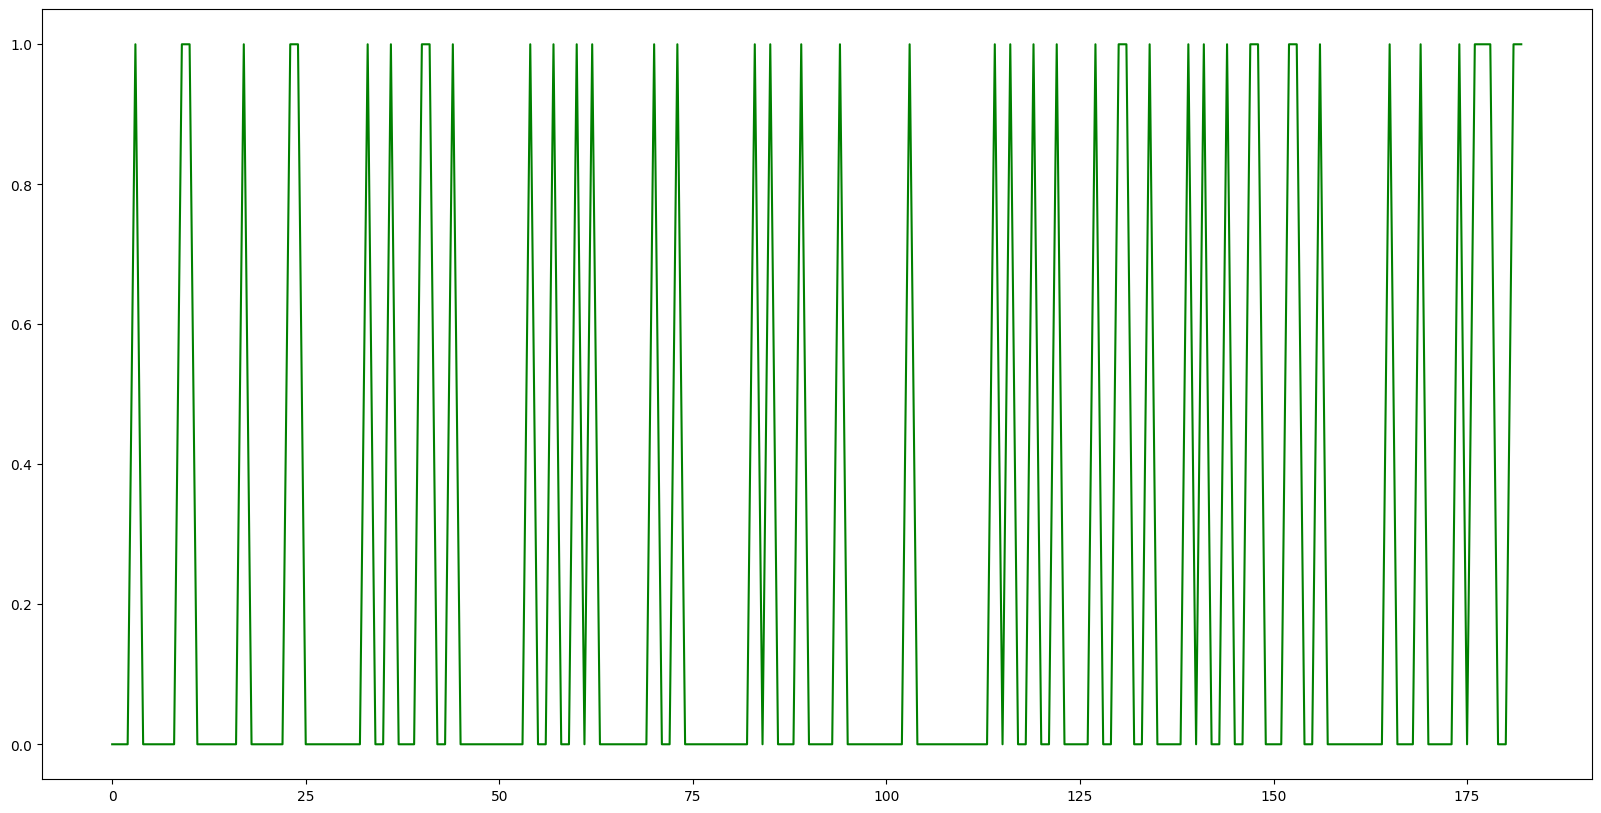

In [ ]:
# plt.plot(p_list[10], label='p-value (window=10)', color='blue')
plt.plot(p_list[1], label='p-value (window=50)', color='green')
# plt.plot(p_list[100], label='p-value (window=100)', color='red')

The SpikeSorting loader can be used in spike sorting data for a single insertion. It can be instantiated with an ONE instance and either a pid or and eid, pname combination

In [ ]:
# import spikesorting loader
from brainbox.io.one import SpikeSortingLoader
# import ONE and instantiate
from one.api import ONE
one = ONE()
# define pid
pid = '695476f6-4c14-4a2f-b658-948514629079'

# instantiate with a pid
spike_loader = SpikeSortingLoader(pid=pid, one=one)

# alternatively instantiate with an eid and probe name
eid, pname = one.pid2eid(pid)
spike_loader = SpikeSortingLoader(eid=eid, one=one, pname=pname)

Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/average_template_25.nrrd Bytes: 32998960


100%|██████████| 31.470260620117188/31.470260620117188 [00:07<00:00,  3.96it/s]


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/annotation_25.nrrd Bytes: 4035363


100%|██████████| 3.848422050476074/3.848422050476074 [00:09<00:00,  2.39s/it]


Once the spike sorting loader has been instantiated the data can be loaded in the following way

In [ ]:
# Download and load data
spikes, clusters, channels = spike_loader.load_spike_sorting()
# Assign brain location information from channels to clusters
clusters = spike_loader.merge_clusters(spikes, clusters, channels)

/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.amps.npy: 100%|██████████| 91.9M/91.9M [00:01<00:00, 49.7MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.clusters.npy: 100%|██████████| 46.0M/46.0M [00:00<00:00, 67.2MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/spikes.depths.npy: 100%|██████████| 91.9M/91.9M [00:00<00:00, 96.2MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/channels.brainLocationIds_ccf_2017.npy: 100%|██████████| 3.20k/3.20k [00:00<00:00, 13.2kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe00/pykilosort/#2024-05-06#/channels.labels.npy: 100%|██████████| 512/512 [00:00<00:00, 2.33kB/s]
/root/Downloads/ONE/openalyx

---


> 📘 **FURTHER READING**
> *   [SpikeSortingLoader](https://int-brain-lab.github.io/iblenv/_autosummary/brainbox.io.one.html#brainbox.io.one.SpikeSortingLoader)


---

In [ ]:
spikes.keys(), clusters.keys()

(dict_keys(['amps', 'clusters', 'depths', 'times']),
 dict_keys(['channels', 'depths', 'uuids', 'cluster_id', 'amp_max', 'amp_min', 'amp_median', 'amp_std_dB', 'contamination', 'contamination_alt', 'drift', 'missed_spikes_est', 'noise_cutoff', 'presence_ratio', 'presence_ratio_std', 'slidingRP_viol', 'spike_count', 'firing_rate', 'label', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um', 'lateral_um', 'labels', 'rawInd']))

In [ ]:
# clusters

# clusters['acronym'].shape, clusters['channels'].shape
# np.unique(clusters['acronym'])

# clusters.keys()

In [ ]:
spikes.keys(),clusters.keys(), channels.keys()


(dict_keys(['amps', 'clusters', 'depths', 'times']),
 dict_keys(['channels', 'depths', 'uuids', 'cluster_id', 'amp_max', 'amp_min', 'amp_median', 'amp_std_dB', 'contamination', 'contamination_alt', 'drift', 'missed_spikes_est', 'noise_cutoff', 'presence_ratio', 'presence_ratio_std', 'slidingRP_viol', 'spike_count', 'firing_rate', 'label', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um', 'lateral_um', 'labels', 'rawInd']),
 dict_keys(['x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um', 'lateral_um', 'labels', 'rawInd']))

### 🏠 EphysSessionLoader

The EphysSessionLoader is combination of both the session loader and spikesorting loader and allows you to load in all data, for multiple insertions, for a session


In [ ]:
# import ephyssessionloader
from brainbox.io.one import EphysSessionLoader
# import ONE and instantiate
from one.api import ONE
one = ONE()
# Define eid
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'

# instantiate with an eid
ephys_sess_loader = EphysSessionLoader(eid=eid, one=one)

# load in session data
ephys_sess_loader.load_session_data()

ephys_sess_loader.load_spike_sorting()

2024-07-22 15:55:59 INFO     one.py:1404 Loading trials data


INFO:ibllib:Loading trials data
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_trials.table.pqt: 100%|██████████| 50.4k/50.4k [00:00<00:00, 163kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_trials.stimOff_times.npy: 100%|██████████| 4.99k/4.99k [00:00<00:00, 20.8kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_trials.goCueTrigger_times.npy: 100%|██████████| 4.99k/4.99k [00:00<00:00, 21.2kB/s]

2024-07-22 15:56:01 INFO     one.py:1404 Loading wheel data



INFO:ibllib:Loading wheel data
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_wheel.position.npy: 100%|██████████| 7.87M/7.87M [00:01<00:00, 7.03MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_wheel.timestamps.npy: 100%|██████████| 7.87M/7.87M [00:00<00:00, 15.6MB/s]


2024-07-22 15:56:04 INFO     one.py:1404 Loading pose data


INFO:ibllib:Loading pose data
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_leftCamera.dlc.pqt: 100%|██████████| 40.1M/40.1M [00:11<00:00, 3.40MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_rightCamera.dlc.pqt: 100%|██████████| 89.4M/89.4M [00:05<00:00, 16.5MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/#2023-04-20#/_ibl_rightCamera.times.npy: 100%|██████████| 5.26M/5.26M [00:01<00:00, 4.83MB/s]


2024-07-22 15:56:25 WARNING  one.py:1408 Could not load pose data.


2024-07-22 15:56:25 INFO     one.py:1404 Loading motion_energy data


INFO:ibllib:Loading motion_energy data
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/leftCamera.ROIMotionEnergy.npy: 100%|██████████| 2.10M/2.10M [00:00<00:00, 2.46MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/rightCamera.ROIMotionEnergy.npy: 100%|██████████| 5.26M/5.26M [00:01<00:00, 5.17MB/s]


2024-07-22 15:56:29 WARNING  one.py:1408 Could not load motion_energy data.


2024-07-22 15:56:29 INFO     one.py:1404 Loading pupil data


INFO:ibllib:Loading pupil data
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/_ibl_leftCamera.features.pqt: 100%|██████████| 4.72M/4.72M [00:00<00:00, 5.41MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe01/pykilosort/spikes.amps.npy: 100%|██████████| 54.6M/54.6M [00:01<00:00, 27.4MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe01/pykilosort/spikes.clusters.npy: 100%|██████████| 27.3M/27.3M [00:00<00:00, 38.1MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe01/pykilosort/spikes.depths.npy: 100%|██████████| 54.6M/54.6M [00:00<00:00, 76.7MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/alf/probe01/pykilosort/spikes.times.npy: 100%|██████████| 54.6M/54.6M [00:00<00:00, 84.9MB/s]
/root/Downloads/ONE/openalyx.internati

The session data can be accessed in the same way as the session loader,

In [ ]:
# access the pose data and see which cameras are present
print(f'Cameras in pose data: {ephys_sess_loader.pose.keys()}')

Cameras in pose data: dict_keys(['leftCamera', 'rightCamera'])


The spikesorting data for each insertion is stored as a dict in the `ephys` attribute,

In [ ]:
# Access the insertion names that we have data for
probes = list(ephys_sess_loader.ephys.keys())
print(f'Name of probes loaded: {probes}')

# Acess the spikesorting data for the first probe
spikes = ephys_sess_loader.ephys[probes[0]]['spikes']
print(f'Keys of spikes data: {spikes.keys()}')

Name of probes loaded: ['probe01', 'probe00']
Keys of spikes data: dict_keys(['amps', 'clusters', 'depths', 'times'])


---


> 📘 **FURTHER READING**
> *   [EphysSessionLoader](https://int-brain-lab.github.io/iblenv/_autosummary/brainbox.io.one.html#brainbox.io.one.EphysSessionLoader)


---

### 🏠 Raw video streamer

It is possible to download the full video file for a session using the `one.load` methods, however the video filea are large and it is sometimes preferable to only stream a portion of the video. This can be done using the `video` module in `ibllib`


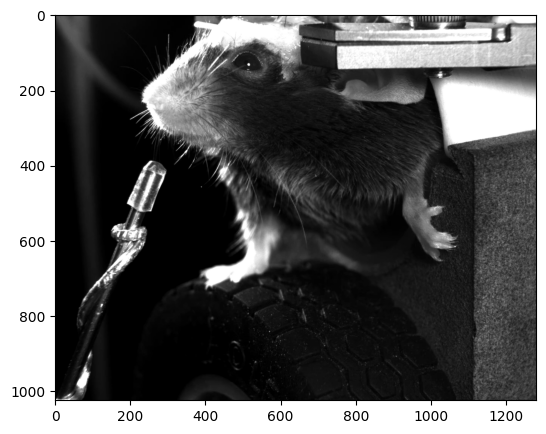

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# import video
from ibllib.io import video
# import ONE and instantiate
from one.api import ONE
one = ONE()
# Define eid
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
label = 'left' # 'left', 'right' or 'body'

# Find url of video data to stream
url = video.url_from_eid(eid, one=one)[label]

# Load video timestamps
ts = one.load_dataset(eid, f'*{label}Camera.times*', collection='alf')

# Find the frame closest to 1000s into data
frame_n = np.searchsorted(ts, 1000)

# Take the 0-1-2nd frame after this frame_n
frames_id = range(frame_n, frame_n+3)

# Stream the data
frame = video.get_video_frames_preload(url, frames_id)

# Plot the first frame
plt.imshow(frame[0], cmap='gray')

---


> 📘 **FURTHER READING**
> *   [Loading raw video data](https://int-brain-lab.github.io/iblenv/notebooks_external/loading_raw_video_data.html)


---

### 🏠 Raw Ephys streamer

Similarly, the raw ephys data is large, and whilst you can download the whole file via `one.load` you might prefer to stream the data file and load only a small snippet of it. This can be done using the `Streamer` class.


In [ ]:
# import Streamer
from brainbox.io.spikeglx import Streamer
# import ONE and instantiate
from one.api import ONE
one = ONE()
# define pid
pid = '695476f6-4c14-4a2f-b658-948514629079'


time0 = 100 # timepoint in recording to stream
time_win = 1 # number of seconds to stream

# Stream data from ap band
sr_ap = Streamer(pid=pid, one=one, remove_cached=False, typ='ap')
s0 = time0 * sr_ap.fs
tsel = slice(int(s0), int(s0) + int(time_win * sr_ap.fs))

# Important: remove sync channel from raw data, and transpose
raw_ap = sr_ap[tsel, :-sr_ap.nsync].T

# Stream data from lf band
sr_lf = Streamer(pid=pid, one=one, remove_cached=False, typ='lf')
s0 = time0 * sr_lf.fs
tsel = slice(int(s0), int(s0) + int(time_win * sr_lf.fs))

# Important: remove sync channel from raw data, and transpose
raw_lf = sr_lf[tsel, :-sr_lf.nsync].T

/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.ap.ch: 100%|██████████| 136k/136k [00:00<00:00, 234kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.ap.meta: 100%|██████████| 17.7k/17.7k [00:00<00:00, 67.6kB/s]


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/cache/ap/danlab/Subjects/DY_014/2020-07-14/001/raw_ephys_data/probe00/chunk_000099_to_000100/_spikeglx_ephysData_g0_t0.imec0.ap.4e66d1cb-57b2-403c-b5a2-2128f46b3a4f.cbin Bytes: 17476271


100%|██████████| 16.66667079925537/16.66667079925537 [00:01<00:00,  8.89it/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.lf.ch: 100%|██████████| 126k/126k [00:00<00:00, 232kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/danlab/Subjects/DY_014/2020-07-14/001/raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.lf.meta: 100%|██████████| 13.9k/13.9k [00:00<00:00, 63.1kB/s]


Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/cache/lf/danlab/Subjects/DY_014/2020-07-14/001/raw_ephys_data/probe00/chunk_000099_to_000100/_spikeglx_ephysData_g0_t0.imec0.lf.ba74d8d7-a085-4422-9e5a-d7f3001c96e0.cbin Bytes: 1077013


100%|██████████| 1.0271196365356445/1.0271196365356445 [00:00<00:00,  1.13it/s]


The raw ephys data can be de-noised using following destripe methods (these differ for the `ap` and `lf` bands).

In [ ]:
# Destripe the ap signal
from neurodsp.voltage import destripe, destripe_lfp
destriped_ap = destripe(raw_ap, fs=sr_ap.fs)

# Destripe the lf signal
from neurodsp.voltage import destripe_lfp
destriped_lf = destripe_lfp(raw_lf, fs=sr_lf.fs)

/usr/local/lib/python3.10/dist-packages/neurodsp/__init__.py:5: FutureWarning: neurodsp has been renamed to ibldsp and the old name will be deprecated on 01-Sep-2024.
  warn(


---


> 📘 **FURTHER READING**
> *   [Navigating the atlas website](https://github.com/int-brain-lab/iblbrainviewer/blob/main/docs/atlas_website_using_the_website.ipynb)


---

# Exploring the data

### Example 1: Characterising the reaction time of the subject in a session

In this example we show how to

1.   Load in trials data for a particular session using `one.load_object`
2.   Explore the trials object
3.   Compute the reaction time for each trial in the session
4.   Compute whether there are differences in reaction time depending on trial type (left vs right stimulus, correct vs incorrect trial)
5.   Plot the reaction time across the duration of the session



In [ ]:
# 1. Load in trials data
from one.api import ONE
import numpy as np

one = ONE()
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
trials = one.load_object(eid, 'trials')

In [ ]:
# 2. Explore the trials object

# Find the keys in our object
keys = trials.keys()

# Convert the trials dict to a pandas dataframe
trials_df = trials.to_df()

# Display the trials table
from IPython.display import display # import module to display dataframe nicely
display(trials_df)


,stimOff_times,goCueTrigger_times,choice,contrastLeft,stimOn_times,response_times,goCue_times,firstMovement_times,probabilityLeft,contrastRight,feedbackType,rewardVolume,feedback_times,intervals_0,intervals_1
0,15.867546,14.145882,-1.0,NaN,14.145685,14.800484,14.146585,14.479997,0.5,1.000,1.0,1.5,14.800586,10.969770,16.367592
1,19.617038,18.296189,1.0,0.2500,18.296037,18.552188,18.296837,18.437997,0.5,NaN,1.0,1.5,18.552278,16.748692,20.117087
2,22.462120,20.979787,-1.0,NaN,20.979602,21.396189,20.980468,21.110997,0.5,0.250,1.0,1.5,21.396293,20.487884,22.962199
3,25.212778,23.834504,-1.0,NaN,23.834316,24.152707,23.835416,24.047997,0.5,0.125,1.0,1.5,24.152818,23.336199,25.712823
4,28.034496,26.650927,-1.0,NaN,26.650735,26.963229,26.651735,26.735997,0.5,0.250,1.0,1.5,26.963303,26.085824,28.534539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,2883.413596,2881.596802,-1.0,NaN,2881.596645,2882.352307,2881.597778,2882.013997,0.2,0.000,1.0,1.5,2882.352403,2881.060798,2883.913720
604,2888.246880,2885.685226,-1.0,0.0625,2885.685069,2886.185928,2885.686069,2885.973997,0.2,NaN,-1.0,0.0,2886.186719,2884.817523,2888.746939
605,2891.918113,2890.201343,-1.0,NaN,2890.201184,2890.846547,2890.201984,2890.420997,0.2,0.250,1.0,1.5,2890.846653,2889.643640,2892.418160
606,2950.578646,2894.046465,1.0,0.1250,2894.046333,2949.519476,2894.047266,2894.367997,0.2,NaN,1.0,1.5,2949.519585,2893.415063,2951.078685


In [ ]:
# 3. Compute reaction time
# Define reaction time as the time when the visual stimulus first appears and detected response time
reaction_time = trials['response_times'] - trials['stimOn_times']

In [ ]:
# 4. Evaluate reaction time across different trial types
# Compare reaction time for left vs right trials
left_trial_idx = ~np.isnan(trials['contrastLeft'])
right_trial_idx = ~np.isnan(trials['contrastRight'])
left_reaction_time = np.mean(reaction_time[left_trial_idx])
right_reaction_time = np.mean(reaction_time[right_trial_idx])
print(f'Average reaction time for stimulus on')
print(f'Left: {left_reaction_time}')
print(f'Right: {right_reaction_time}')

# Compare reaction time for correct vs incorrect trials
correct_trial_idx = trials['feedbackType'] == 1
incorrect_trial_idx = trials['feedbackType'] == -1
correct_reaction_time = np.mean(reaction_time[correct_trial_idx])
incorrect_reaction_time = np.mean(reaction_time[incorrect_trial_idx])
print(f'\nAverage reaction time for trials that were')
print(f'Correct: {correct_reaction_time}')
print(f'Incorrect: {incorrect_reaction_time}')

Average reaction time for stimulus on
Left: 2.6305362305886573
Right: 1.0581783527741766

Average reaction time for trials that were
Correct: 0.9801639861488436
Incorrect: 5.3063314715867325


Text(0, 0.5, 'Reaction time (s)')

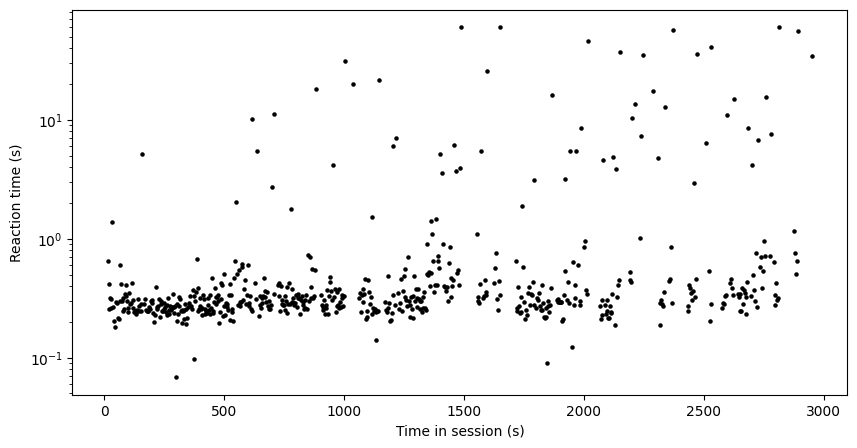

In [ ]:
# 5. Make plot of reaction time across session
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(trials['stimOn_times'], reaction_time, c='k', s=5)
ax.set_yscale("log")  # set y axis to log scale
ax.set_xlabel('Time in session (s)')
ax.set_ylabel('Reaction time (s)')

### 🏠 Example 2: Characterising the electrophysiology data of a single insertion

In this example we show how to

1.   Load in spikesorting data for a single insertion data
2.   Evaluate the number of good clusters
3.   Find the location of good clusters in the brain
4.   Compute the firing rate of each cluster
5.   Plot the firing rate of good clusters alongside their brain location



In [ ]:
# 1. Load in spikesorting data for pid
from brainbox.io.one import SpikeSortingLoader
from one.api import ONE
from iblatlas.atlas import AllenAtlas
import numpy as np

ba = AllenAtlas()
one = ONE()
pid = '695476f6-4c14-4a2f-b658-948514629079'

ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

In [ ]:
# 2. Evaluate the number of good clusters
# The spikesortingloader loads data for all clusters (both mua and good) detected by the spikesorter.
# We can restrict to only the good clusters by finding the clusters with a label of 1
good_cluster_idx = clusters['label'] == 1
clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

all_clusters = clusters['label'].shape
good_clusters = clusters_good['label'].shape
print(f'Total no. of clusters: {all_clusters}')
print(f'Number of good clusters: {good_clusters}')

Total no. of clusters: (383,)
Number of good clusters: (55,)


In [ ]:
# 3. Find the location of clusters in brain
# The location of the clusters can be found in the atlas_id (Allen CCF ids) or acronym attributes of the clusters object
acronyms = clusters_good['acronym']
unique_acronyms, count = np.unique(acronyms, return_counts=True)
for a, c in zip(unique_acronyms, count):
  print(f'{a}: {c}')

RT: 1
SSp-bfd2/3: 4
SSp-bfd4: 14
SSp-bfd5: 1
SSp-bfd6a: 7
VPL: 28


In [ ]:
clusters_good['channels']
# clusters_good['spikes']
clusters_good.keys()

dict_keys(['channels', 'depths', 'uuids', 'cluster_id', 'amp_max', 'amp_min', 'amp_median', 'amp_std_dB', 'contamination', 'contamination_alt', 'drift', 'missed_spikes_est', 'noise_cutoff', 'presence_ratio', 'presence_ratio_std', 'slidingRP_viol', 'spike_count', 'firing_rate', 'label', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um', 'lateral_um', 'labels', 'rawInd'])

In [ ]:
spikes.clusters.shape, spikes.depths.shape
spikes.keys()

spikes.times.shape

(11489983,)

In [ ]:
# 4. Compute the firing rate of each cluster
# The firing rate of each cluster can be found in the firing rate atrribute of the clusters object
firing_rate = clusters_good['firing_rate']

# To show the interaction between the clusters and the spikes object we will show how you can compute
# the firing rate from the data

# To compute the firing rate we first need to compute the number of spikes detected for each cluster
n_spikes = np.empty((clusters_good['cluster_id'].shape))
# Loop over the cluster ids
for i, c in enumerate(clusters_good['cluster_id']):
  # Find location where each cluster id is found in the spikes objects and get the sum
  cidx = np.sum(spikes['clusters'] == c)
  n_spikes[i] = cidx

# To compute the firing rate we can divide the spike count by the total duration of the recording
duration = np.max(spikes['times']) - np.min(spikes['times'])
firing_rate_from_spikes = n_spikes / duration

# Make sure that the values for firing rates are the same
np.array_equal(firing_rate_from_spikes, firing_rate)

True

<ipython-input-66-0b01a9616d33>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
<ipython-input-66-0b01a9616d33>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))


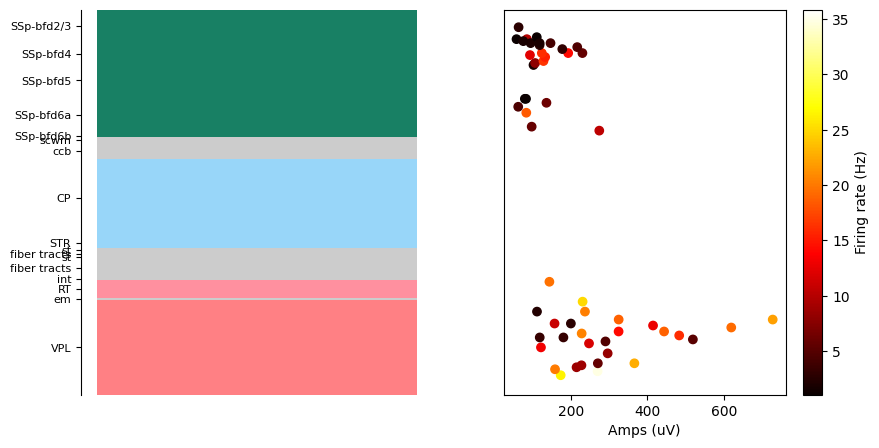

In [ ]:
# 5. Plot firing rate and brain locations
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from brainbox.ephys_plots import plot_brain_regions
clusters_good.keys()

norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
firing_rate_cols = mapper.to_rgba(firing_rate)

fig, axs = plt.subplots(1, 2)
# Plot the brain regions through which the channels on the insertion pass
plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
# Plot scatter plot of cluster depths vs cluster amp with firing rate encoded in colour
# Map firing rate values to colours
norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
firing_rate_cols = mapper.to_rgba(firing_rate)
axs[1].scatter(clusters_good['amp_median'] * 1e6, clusters_good['depths'], c=firing_rate_cols)
axs[1].set_xlabel('Amps (uV)')
axs[1].get_yaxis().set_visible(False)
# Add colorbar
cbar = fig.colorbar(mapper, ax=axs[1])
cbar.set_label('Firing rate (Hz)')

### Example 3: Characterising event aligned activity of a single cluster

In this example we will show how to


1.   Load in trials data for a single session and spikesorting data for a single insertion
2.   Get spikes for chosen cluster
3.   Compute and plot firing rate of cluster around trial event
4.   Compute and plot peristimulus time histograms for different trial conditions (left vs right, correct vs incorrect)



In [ ]:
# 1. Load in trials data and spikesorting data
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from one.api import ONE
from iblatlas.atlas import AllenAtlas
import numpy as np

ba = AllenAtlas()
one = ONE()
pid = '695476f6-4c14-4a2f-b658-948514629079'
eid, _ = one.pid2eid(pid)

sl = SessionLoader(eid=eid, one=one)
sl.load_trials()

ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

In [ ]:
# ba.keys()

In [ ]:
clusters['acronym']

array(['VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL', 'VPL',
       'VPL', 'VPL',

In [ ]:
# 2. Get spikes for a single cluster
# Get the 25th good cluster
cluster_id = np.where(clusters['label'] == 1)[0][26]

# Get the index of the spikes object for the chosen cluster
spikes_idx = spikes['clusters'] == cluster_id

In [ ]:
cluster_id

197

In [ ]:
np.unique(spikes['clusters'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Text(0, 0.5, 'Trial number')

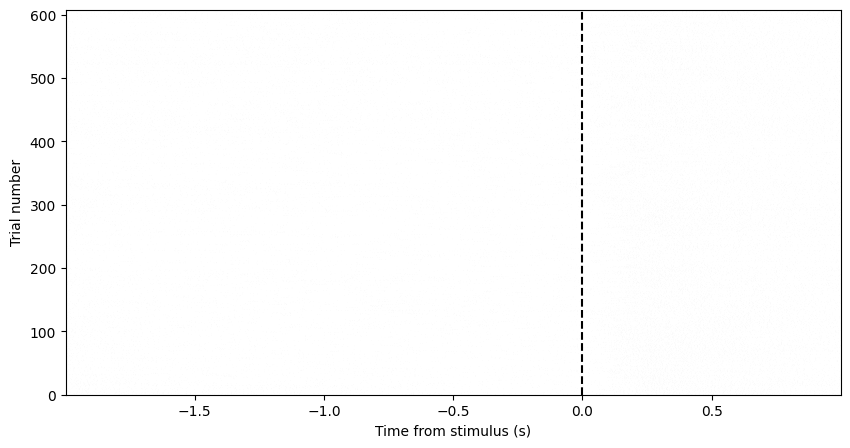

In [ ]:
# 3. Compute firing rate of cluster around trial event and plot as a raster
# Find times when stimulus appears
events = sl.trials['stimOn_times']

from brainbox.singlecell import bin_spikes
# Compute number of spikes in 0.05s bins between 0.5s before stimulus presentation to 1s after stimulus presentation
bin_size = 0.002
pre_time = 2
post_time = 1
spike_raster, times = bin_spikes(spikes.times[spikes_idx], np.array(events), pre_time=pre_time, post_time=post_time, bin_size=bin_size)
spikes_raster = spike_raster / bin_size

fig, ax = plt.subplots()
ax.imshow(spike_raster, extent=[times[0], times[-1], 0, events.size], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
ax.axvline(0, c='k', linestyle='--')
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trial number')

In [ ]:
len(np.where(clusters['label'] == 1)[0])

55

In [ ]:
#  bin_size=0.02
#  window_size = closest_upper_even(int(0.3//bin_size))
#  window_size

In [ ]:
# 2. Get spikes for a single cluster
# Get the 25th good cluster
for i in range(len(np.where(clusters['label'] == 1)[0])):
  bin_size=0.002
  cluster_id = np.where(clusters['label'] == 1)[0][i]

  # Get the index of the spikes object for the chosen cluster
  spikes_idx = spikes['clusters'] == cluster_id

  spike_raster, times = bin_spikes(spikes.times[spikes_idx], np.array(events), pre_time=pre_time, post_time=post_time, bin_size=bin_size)
  data = np.sum(spike_raster, axis = 0)# Replace with your data
  print(data.shape)
  make_p_val(bin_size,data)


(1500,)


NameError: name 'make_p_val' is not defined

In [ ]:
spike_raster

In [ ]:
spike_raster.shape
import numpy as np
from scipy.stats import wilcoxon



# times

In [ ]:
# data

In [ ]:
spike_raster

In [ ]:
data = spike_raster
data = np.sum(spike_raster, axis = 0)# Replace with your data
data.shape


In [ ]:
data = np.sum(spike_raster, axis = 0)# Replace with your data

import numpy as np
from scipy.stats import wilcoxon

# Your data (replace with your actual data)
# data = np.array([1.2, 1.5, 1.8, 2.0, 1.6, 1.3, ...])  # Replace with your data

import math

def closest_upper_even(number):
    # Round up to the nearest integer
    rounded_number = math.ceil(number)

    # If the rounded number is odd, make it even
    if rounded_number % 2 != 0:
        rounded_number += 1

    return rounded_number

# Example usage:
my_number = 7.3
result = closest_upper_even(my_number)
print(f"Closest upper even number for {my_number} is {result}")

# Sliding window size (25 ms)
window_size = closest_upper_even(int(0.3//bin_size))
print("window_size", window_size)
  # milliseconds

# Initialize an empty list to store results
results = []

# Iterate over the data using the sliding window
# window_size: 30
# i: 30, 31, 32 ....... 300
for i in range(window_size, len(data)):
    window_data = data[i - window_size : i]  # Extract the window
    # Split the window data into two halves
    half_size = len(window_data) // 2
    # print(len(window_data),half_size)
    first_half = window_data[:half_size]
    second_half = window_data[half_size:]
    # print(first_half, second_half)
    # Perform the Wilcoxon test between the halves
    _, p_value = wilcoxon(first_half, second_half)

    results.append(p_value)

# Now 'results' contains the p-values for each sliding window position
print(results)  # Replace with your desired output handling

from matplotlib import pyplot as plt
plt.plot(results)
plt.figure()
plt.plot(data)
# 1 x time_samples

In [ ]:
def make_p_val(bin_size, data):
  print(bin_size)
  window_size = closest_upper_even(int(0.3//bin_size))
  print("window_size", window_size)
    # milliseconds

  # Initialize an empty list to store results
  results = []
  for i in range(window_size, len(data)):
      window_data = data[i - window_size : i]  # Extract the window
      # Split the window data into two halves
      half_size = len(window_data) // 2
      # print(len(window_data),half_size)
      first_half = window_data[:half_size]
      second_half = window_data[half_size:]
      # print(first_half, second_half)
      # Perform the Wilcoxon test between the halves
      _, p_value = wilcoxon(first_half, second_half)
      results.append(p_value)


  plt.figure()
  plt.plot(results)
  # plt.figure()
  # plt.plot(data)


In [ ]:
for i in range()

In [ ]:
import seaborn as sns
from scipy.stats import shapiro
# w=40
print(window_size)
normality = []
for i in range(window_size,len(data)):
  window = data[i-window_size:i]
  plt.figure()
  sns.histplot(window)
  sns.histplot(window,kde=True,element="poly")
  _, p_value = shapiro(window)
  normality.append(p_value)


In [ ]:
np.array(normality)*100

In [ ]:
# plt.plot(x_values, lennormali, label='Data')
plt.plot(np.array(normality)*100)
plt.ylabel("p-value")

In [ ]:
# 4. Compute peri stimulus time histogram for different trial events
# Compute psth for left vs right stimulus trials
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
psth_left = np.nanmean(spike_raster[left_idx], axis=0)
psth_right = np.nanmean(spike_raster[right_idx], axis=0)

# Compute psth for correct vs incorrect trials
correct_idx = sl.trials['feedbackType'] == 1
incorrect_idx = sl.trials['feedbackType'] == -1
psth_correct = np.nanmean(spike_raster[correct_idx], axis=0)
psth_incorrect = np.nanmean(spike_raster[incorrect_idx], axis=0)

# Plot the psths
fig, axs = plt.subplots(1, 2)
axs[0].plot(times, psth_left, c='green')
axs[0].plot(times, psth_right, c='yellow')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')

axs[1].plot(times, psth_correct, c='blue')
axs[1].plot(times, psth_incorrect, c='red')
axs[1].legend(['correct', 'incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')

### 🏠 Example 4: Characterising event aligned activity of wheel velocity and paw position


In this example we will show how to


1.   Load in trials, wheel and pose data using SessionLoader
2.   Smoothing the wheel trace
3.   Plot the paw trace for a given trial
4.   Compute and plot the average wheel and paw trace for all trials

In [ ]:
# 1. Load trials, wheel and pose data
from brainbox.io.one import SessionLoader
from one.api import ONE
import numpy as np

one = ONE()
eid = '4720c98a-a305-4fba-affb-bbfa00a724a4'
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
sl.load_wheel()
sl.load_pose()


In [ ]:
# 2. Smoothing the wheel trace
# When using the sessionloader the wheel trace is automatically smoothed and the velocity and acceleration computed

# Get the interval for the 100th trial
t0 = sl.trials['intervals_0'][100]
t1 = sl.trials['intervals_1'][100]
idx = np.searchsorted(sl.wheel['times'], np.r_[t0, t1])

import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(sl.wheel['times'][idx[0]:idx[1]], sl.wheel['position'][idx[0]:idx[1]] - sl.wheel['position'][idx[0]]) # subtract first position point
axs[0].set_ylabel('Position')
axs[1].plot(sl.wheel['times'][idx[0]:idx[1]], sl.wheel['velocity'][idx[0]:idx[1]])
axs[1].set_ylabel('Velocity')
axs[2].plot(sl.wheel['times'][idx[0]:idx[1]], sl.wheel['acceleration'][idx[0]:idx[1]])
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Acceleration')

In [ ]:
# 3. Plot the paw trace for a given trial

# compute the paw speed for left and right camera (note 'paw_r' is always the paw closest to the camera)
from brainbox.behavior.dlc import get_speed
paw_left_speed = get_speed(sl.pose['leftCamera'],sl.pose['leftCamera']['times'], camera='left', feature='paw_l')
paw_right_speed = get_speed(sl.pose['rightCamera'],sl.pose['rightCamera']['times'], camera='right', feature='paw_r')

# left camera
idx_left = np.searchsorted(sl.pose['leftCamera']['times'], np.r_[t0, t1])
# right camera
idx_right = np.searchsorted(sl.pose['rightCamera']['times'], np.r_[t0, t1])

fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(sl.pose['leftCamera']['times'][idx_left[0]:idx_left[1]], paw_left_speed[idx_left[0]:idx_left[1]])
axs[0].set_ylabel('L cam paw speed')
axs[1].plot(sl.pose['rightCamera']['times'][idx_right[0]:idx_right[1]], paw_right_speed[idx_right[0]:idx_right[1]])
axs[1].set_ylabel('R cam paw speed')
axs[1].set_xlabel('Time')

In [ ]:
# 4. Compute and plot the average wheel and paw trace for all trials
# Find times when first move is detected
events = sl.trials['firstMovement_times']

from brainbox.singlecell import bin_spikes
# Compute raster of wheel in 0.05s bins between 0.5s before the first move is detected to 1s after the first move is detected
bin_size = 0.05
pre_time = 0.5
post_time = 1
wheel_raster, times = bin_spikes(sl.wheel['times'], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size, weights=sl.wheel['velocity'])
paw_raster, times = bin_spikes(sl.pose['leftCamera']['times'], events, pre_time=pre_time, post_time=post_time, bin_size=bin_size, weights=paw_left_speed)

left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
wheel_psth_left = np.nanmean(wheel_raster[left_idx], axis=0)
wheel_psth_right = np.nanmean(wheel_raster[right_idx], axis=0)
paw_psth_left = np.nanmean(paw_raster[left_idx], axis=0)
paw_psth_right = np.nanmean(paw_raster[right_idx], axis=0)

# Plot the psths
fig, axs = plt.subplots(1, 2, gridspec_kw={'wspace': 0.5})
axs[0].plot(times, wheel_psth_left, c='green')
axs[0].plot(times, wheel_psth_right, c='yellow')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from first move (s)')
axs[0].set_ylabel('Wheel velocity (rad/s)')

axs[1].plot(times, paw_psth_left, c='green')
axs[1].plot(times, paw_psth_right, c='yellow')
axs[0].legend(['left', 'right'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from first move (s)')
axs[1].set_ylabel('Paw velocity')


### Example 5: Aggregating cluster data across insertions

In this example we will show how to

1.   Search for insertions passing through a chosen brain area
2.   Load in relevant data for each insertion to create a table containing cluster amplitude and brain location
3.   Download a clusters table for all BWM data
2.   Aggregate features across regions
3.   Plot features on atlas slices


In [ ]:
# 1. Search for insertions passing through a chosen brain area

from one.api import ONE
from iblatlas.atlas import AllenAtlas
import pandas as pd
one = ONE()
ba = AllenAtlas()

acronym = 'VPL'
insertions = one.search_insertions(atlas_acronym=acronym, query_type='remote')
print(f'No. of insertions in {acronym}: {len(insertions)}')

In [ ]:
# 2. Load in relevant data for each insertion to create a table containing cluster amplitude and brain location

all_clusters = []
for pid in insertions:
  eid, name = one.pid2eid(pid)
  # Load in clusters data that we need, amps and channels attributes
  clusters = one.load_object(eid, 'clusters', attribute=['amps', 'channels'], collection=f'alf/{name}/pykilosort')
  # Load in channels data that we need. This gives the Allen CCF location of each channel
  channels_atlas_id = one.load_dataset(eid, 'channels.brainLocationIds_ccf_2017', collection=f'alf/{name}/pykilosort')
  # Use channels_atlas_id and clusters.channels to compute the atlas_id of each cluster
  clusters['atlas_ids'] = channels_atlas_id[clusters['channels']]
  # Use regions object to convert atlas ids to acronyms
  clusters['acronyms'] = ba.regions.id2acronym(clusters['atlas_ids'])
  # Convert clusters object to pandas dataframe and add the pid as a column
  clusters_df = clusters.to_df()
  clusters_df['pid'] = pid
  # Append table from individual pid to list
  all_clusters.append(clusters_df)


# concatenate into one big table
all_clusters = pd.concat(all_clusters)

In [ ]:
# display the table
from IPython.display import display # import module to display dataframe nicely
display(all_clusters)

In [ ]:
# 3. Download a clusters table from all BWM data

# In step 2. of this example showed how we can build our own clusters table using insertions we are interested in.
# As part of the brainwide-map we have also released a table containing all clusters from the brain-wide map dataset.
# Here we show how this can be downloaded and loaded

from one.remote import aws
s3, bucket_name = aws.get_s3_from_alyx(alyx=one.alyx)

# Define where the table will be saved
table_path = one.cache_dir.joinpath('bwm_features', 'clusters_table.pqt')
# Download the table
aws.s3_download_file("aggregates/2022_Q4_IBL_et_al_BWM/clusters.pqt", table_path, s3=s3, bucket_name=bucket_name)

# Load in the file as a pandas table
clusters_table = pd.read_parquet(table_path)

# Display the table
display(clusters_table)

In [ ]:
# 4. Aggregate features across regions

# Restrict table to just good clusters
clusters_table = clusters_table[clusters_table['label'] == 1]

# Group the pandas table by region acronyms
regions = clusters_table.groupby('acronym')

# Find the mean firing rate per region
fr_region = regions.firing_rate.mean()

# Get out the values as arrays, the acronyms are stored in the index of the table
# and the mean firing rate as a column
acronyms = fr_region.index.values
fr = fr_region.values

In [ ]:
# 5. Plot features on atlas slices

# import ibllib atlas module
from iblatlas.plots import plot_scalar_on_slice
from iblatlas.atlas import AllenAtlas
import numpy as np
ba = AllenAtlas()

# compute colormap levels
levels = np.nanquantile(fr, [0.1, 0.9])

# plot coronal slice at -2000 um from bregma
fig, axs = plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='coronal', background='boundary', cmap='Blues', clevels=levels, ba=ba)

# plot sagittal slice at -2000 um from bregma
fig, axs = plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='sagittal', background='boundary', cmap='Blues', clevels=levels, ba=ba)

# plot horizontl slice at -2000 um from bregma
fig, axs = plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='horizontal', background='boundary', cmap='Blues', clevels=levels, ba=ba)

# FAQ



Where can I find out more information about the IBL?
- [IBL website](https://www.internationalbrainlab.com/)

How can I easily explore the IBL data available?
- [IBL visualisation website](https://viz.internationalbrainlab.org/)

Where can I find more information about the Brain-wide map?
- [Brain-wide map technical paper](https://figshare.com/articles/preprint/Data_release_-_Brainwide_map_-_Q4_2022/21400815)

Where can I find out more information about available dataset releases?
- [Publically available IBL data](https://int-brain-lab.github.io/iblenv/public_docs/public_introduction.html)

Where can I read more about the science conducted in the IBL?
- [List of publications](https://www.internationalbrainlab.com/publications)

Where can I find out more information about ONE?
- [ONE documentation](https://int-brain-lab.github.io/ONE/)

Where can I find out more information about ibllib and brainbox?
- [ibllib documentation](https://int-brain-lab.github.io/iblenv/010_api_reference.html)

Where can I find out more information about iblatlas?
- [Atlas examples](https://int-brain-lab.github.io/iblenv/atlas_examples.html)

Where can I find out more information about different IBL datasets?
- [Description of public datasets](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.hnjqyfnroyya)

Where can I find help?
- Issues with the data? Post an issue here: https://neurostars.org/ with the tag `ibl`
- Alternatively post an issue here: https://github.com/int-brain-lab/iblenv/issues
- General questions about the datasets or publications? Email: info@internationalbrainlab.org

